# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd
!pip install xlrd

You should consider upgrading via the '/Users/terri/.pyenv/versions/3.10.3/bin/python3.10 -m pip install --upgrade pip' command.


## 1. Read in the file using pandas, and look at the first five rows

* *Tip: You will probably need to pip install something to make this Excel file work!*

In [2]:
!ls

Cherry Blossoms.ipynb KyotoFullFlower7.xls


In [3]:
df = pd.read_excel("KyotoFullFlower7.xls",header=25,na_values="-")


In [4]:
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add **a parameter to make sure your columns look right**. How can you tell pandas to skip rows?

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [5]:
df = pd.read_excel("KyotoFullFlower7.xls",header=25)


## 3. Look at the final five rows of the data

In [6]:
df.tail(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some NaN values

It looks like you should have NaN/missing values in the beginning of the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

* *Tip: it's another open with reading in the file!*

In [7]:
df = pd.read_excel("KyotoFullFlower7.xls",header=25,na_values="-")
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 5. What reference is the most commonly used when figuring out cherry blossom flowering dates?

If the first result is `"-"`, you need to redo the last question.

In [8]:
df.dtypes

AD                             int64
Full-flowering date (DOY)    float64
Full-flowering date          float64
Source code                  float64
Data type code               float64
Reference Name                object
dtype: object

In [9]:
df.groupby('Full-flowering date')['Reference Name'].value_counts()

Full-flowering date  Reference Name            
327.0                (DAINIHON-SHIRYO)             1
                     GIENJUNKO-NIKKI(DAIGO)        1
                     SHIIBA-WAKASHU                1
328.0                GUKANKI                       1
                     NIHONKIRYAKU                  1
                                                  ..
430.0                SUGIURAKE-NIKKI               1
                     ZOKU-HONCHOTSUKAN             1
501.0                OYUDONONO-UENO-NIKKI [EDA]    1
                     YASUSHIGE-KYOKI               1
504.0                HANAZONOTENNO-SHINKI          1
Name: Reference Name, Length: 620, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

In [10]:
df = df.dropna(subset=['Full-flowering date (DOY)'])

## 6.5 Confirm you now have 827 rows

In [11]:
df.shape

(827, 6)

## 7. Make a histogram of the full-flowering date

<AxesSubplot:>

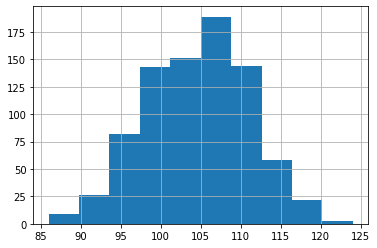

In [12]:
df['Full-flowering date (DOY)'].hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot:>

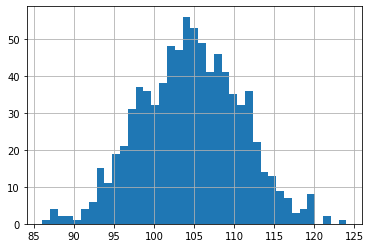

In [13]:
df['Full-flowering date (DOY)'].hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [14]:
df.groupby(by='Full-flowering date (DOY)').describe()

AD                                            \
                          count         mean         std     min      25%   
Full-flowering date (DOY)                                                   
86.0                        1.0  1409.000000         NaN  1409.0  1409.00   
87.0                        4.0  1363.750000  326.507146   961.0  1167.25   
88.0                        2.0  1679.000000  439.820418  1368.0  1523.50   
89.0                        2.0  1358.000000  569.928066   955.0  1156.50   
90.0                        1.0  1156.000000         NaN  1156.0  1156.00   
91.0                        4.0  1798.500000  276.965100  1413.0  1689.00   
92.0                        6.0  1420.000000  483.009317   812.0  1103.75   
93.0                       15.0  1742.600000  207.040645  1412.0  1597.50   
94.0                       11.0  1496.454545  378.044803   963.0  1284.00   
95.0                       19.0  1537.263158  415.512781   869.0  1233.50   
96.0                       21.0  1477.285714  333.069083   831.0  1201.00   
97.0                       31.0  1651.645161  327.004949   930.0  1493.00   
98.0                       37.0  1532.567568  347.614293   908.0  1265.00   
99.0                       36.0  1750.472222  273.443803  1017.0  1543.00   
100.0                      32.0  1509.312500  333.345838   864.0  1264.50   
101.0                      38.0  1555.605263  290.158534   960.0  1352.50   
102.0                      48.0  1589.250000  295.342391   902.0  1365.00   
103.0                      47.0  1512.000000  298.428857   967.0  1266.00   
104.0                      56.0  1495.607143  344.919104   853.0  1185.75   
105.0                      53.0  1530.735849  287.963750   815.0  1359.00   
106.0                      49.0  1528.857143  292.740286   866.0  1322.00   
107.0                      41.0  1563.341463  286.484608   949.0  1346.00   
108.0                      46.0  1514.586957  283.838653   851.0  1337.75   
109.0                      41.0  1574.585366  284.035559   891.0  1422.00   
110.0                      35.0  1578.371429  252.147959   913.0  1368.50   
111.0                      32.0  1526.531250  270.329069  1016.0  1384.75   
112.0                      36.0  1476.861111  278.849796   957.0  1205.00   
113.0                      22.0  1504.954545  309.705925  1018.0  1175.25   
114.0                      14.0  1626.642857  185.960545  1105.0  1573.00   
115.0                      13.0  1486.923077  263.436096  1014.0  1332.00   
116.0                       9.0  1491.888889  284.738672  1029.0  1250.00   
117.0                       7.0  1479.000000  315.104216  1004.0  1264.50   
118.0                       3.0  1698.333333  157.988396  1548.0  1616.00   
119.0                       4.0  1520.000000  245.488628  1194.0  1455.75   
120.0                       8.0  1567.875000  270.539375  1084.0  1470.00   
122.0                       2.0  1578.000000   53.740115  1540.0  1559.00   
124.0                       1.0  1323.000000         NaN  1323.0  1323.00   

                                                   Full-flowering date  \
                              50%      75%     max               count   
Full-flowering date (DOY)                                                
86.0                       1409.0  1409.00  1409.0                 1.0   
87.0                       1424.0  1620.50  1646.0                 4.0   
88.0                       1679.0  1834.50  1990.0                 2.0   
89.0                       1358.0  1559.50  1761.0                 2.0   
90.0                       1156.0  1156.00  1156.0                 1.0   
91.0                       1889.5  1999.00  2002.0                 4.0   
92.0                       1342.0  1832.25  2004.0                 6.0   
93.0                       1690.0  1979.50  2015.0                15.0   
94.0                       1485.0  1791.50  2014.0                11.0   
95.0                       1604.0  1945.00  2010.0          

In [15]:
df['Full-flowering date (DOY)'].describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: Full-flowering date (DOY), dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [16]:
df['AD']<1900

11       True
14       True
30       True
50       True
52       True
        ...  
1210    False
1211    False
1212    False
1213    False
1214    False
Name: AD, Length: 827, dtype: bool

In [17]:
before_1900=df[df['AD']<1900]

In [18]:
before_1900['Full-flowering date (DOY)'].mean()

105.20728291316527

## 11. How about after 1900?

In [19]:
df['AD']>1900

11      False
14      False
30      False
50      False
52      False
        ...  
1210     True
1211     True
1212     True
1213     True
1214     True
Name: AD, Length: 827, dtype: bool

In [20]:
after_1900=df[df['AD']>1900]

In [21]:
after_1900['Full-flowering date (DOY)'].mean()

100.3125

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [22]:
df[df['Data type code']==4].describe()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code
count,39.000000,39.000000,39.000000,39.00000,39.0
mean,1253.179487,102.666667,408.871795,4.74359,4.0
std,250.335130,7.205018,19.954131,1.14059,0.0
min,891.000000,87.000000,327.000000,3.00000,4.0
25%,1060.500000,98.000000,408.000000,4.00000,4.0
50%,1223.000000,103.000000,412.000000,5.00000,4.0
75%,1388.500000,107.000000,417.000000,5.00000,4.0
max,1863.000000,120.000000,429.000000,7.00000,4.0


## 13. Display the rows where our data was from a title in Japanese poetry

In [23]:
df[df['Data type code']==4]

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU
94,895,104.0,414.0,5.0,4.0,NIHONKIRYAKU
95,896,104.0,413.0,5.0,4.0,NIPPON-SANDAI-JITSUROKU
122,923,104.0,414.0,5.0,4.0,ZOKU-KOKIN-WAKASHU
154,955,89.0,330.0,5.0,4.0,SHUISHO
168,969,98.0,408.0,5.0,4.0,NIHONKIRYAKU
206,1007,106.0,416.0,5.0,4.0,MIDO-KAMPAKUKI
232,1033,102.0,412.0,5.0,4.0,NIHONKIRYAKU
235,1036,104.0,413.0,5.0,4.0,NIHONKIRYAKU
259,1060,108.0,417.0,5.0,4.0,SHIN-SENZAI-WAKASHU


## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:>

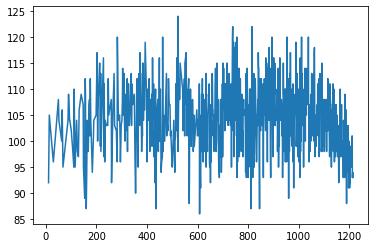

In [24]:
df['Full-flowering date (DOY)'].plot(x='AD',y='Full-flowering date (DOY)')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [25]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: Full-flowering date (DOY), dtype: float64

In [26]:
df['rolling_date']=df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean()

<AxesSubplot:xlabel='AD'>

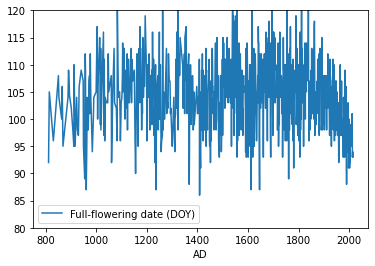

In [27]:
df.plot(x='AD',y='Full-flowering date (DOY)',ylim=(80, 120))

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

## 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [34]:
df['month']=pd.to_datetime(df['Full-flowering date'],format="%m%d")

In [35]:
df['month']

11     1900-04-01
14     1900-04-15
30     1900-04-06
50     1900-04-18
52     1900-04-14
          ...    
1210   1900-04-09
1211   1900-04-10
1212   1900-04-03
1213   1900-04-04
1214   1900-04-03
Name: month, Length: 827, dtype: datetime64[ns]

In [36]:
df['month']=df['month'].dt.month_name()

In [37]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling_date,month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.0,April


## 17. Using your new column, how many blossomings happened in each month?

In [49]:
df.groupby(by='month')['Full-flowering date (DOY)'].mean()

month
April    104.679361
March     87.800000
May      122.666667
Name: Full-flowering date (DOY), dtype: float64

## 18. Make a bar graph of how many blossomings happened in each month.

<AxesSubplot:ylabel='month'>

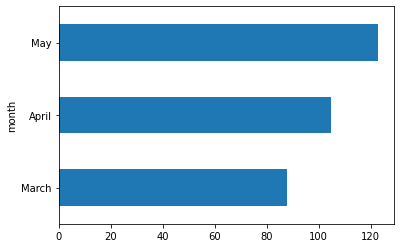

In [51]:
df.groupby(by='month')['Full-flowering date (DOY)'].mean().sort_values().plot(kind='barh')

## 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.`

*Tip: If you didn't drop the rows missing full-flowering dates earlier, it will yell at you about missing data. Go back up and fix Number 6!*

In [86]:
df['day_of_month']=pd.to_datetime(df['Full-flowering date'],format="%m%d")

In [87]:
df['day_of_month']

11     1900-04-01
14     1900-04-15
30     1900-04-06
50     1900-04-18
52     1900-04-14
          ...    
1210   1900-04-09
1211   1900-04-10
1212   1900-04-03
1213   1900-04-04
1214   1900-04-03
Name: day_of_month, Length: 827, dtype: datetime64[ns]

In [88]:
df['day_of_month']=df['day_of_month'].dt.day_name()

In [89]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling_date,month,day_of_month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April,Sunday
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April,Sunday
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April,Friday
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,Wednesday
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.0,April,Saturday


## 20. Adding a date column

If you don't have a nice-looking date column yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. By "nice looking," I mean it should say something like `April 11`.

* Instead of using the two existing columns, you could learn to use `.dt.strftime` as mentioned above.

In [94]:
df['date']=df['Full-flowering date'].dt.strftime("%B%d")

AttributeError: Can only use .dt accessor with datetimelike values

## 21. What day of the week do cherry blossoms like to blossom on?

Do they get the weekends off?

# YOU ARE DONE.

And **incredible.**